In [32]:
import numpy as np
from scipy import fft
import cv2
import matplotlib.pyplot as plt

In [25]:
def homomorphic_filtering(x : np.array, gamma_h=1.01, gamma_l=0.99, c=1, D0=0.1):
    X = fft.fft(x)
    # X = fft.fft(np.log(x + 0.00001))

    d_center = (np.array(X.shape) - 1) / 2
    d = np.array([np.sqrt((range(x.shape[0]) - d_center[0])**2 + (i - d_center[1])**2) for i in range(x.shape[1])]).T
    H = (gamma_h - gamma_l) * (1 - np.exp(-c * d**2 / (D0 * x.shape[0])**2)) + gamma_l
    H = H / np.max(H)

    # Y = np.multiply(X, H)
    Y = X
    y = fft.ifft(Y).real
    # y = np.exp(fft.ifft(Y).real)
    # y = np.interp(np.abs(y), (np.abs(y).min(), np.abs(y).max()), (0, 255))
    return y

In [8]:
img = cv2.imread('../resources/tun.jpg', cv2.IMREAD_GRAYSCALE)

In [6]:
cv2.imshow('Unfiltered image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
img_f = homomorphic_filtering(img)
print(img_f)

[[ 6.  5.  4. ...  4.  4.  4.]
 [ 6.  5.  4. ...  4.  4.  4.]
 [ 5.  5.  4. ...  4.  4.  4.]
 ...
 [17. 27. 34. ...  2.  2.  3.]
 [29. 33. 31. ...  2.  2.  3.]
 [43. 39. 27. ...  2.  2.  3.]]


In [27]:
abs_img_f = np.abs(img_f)
np.interp(abs_img_f, (abs_img_f.min(), abs_img_f.max()), (0, 255))

array([[ 6.,  5.,  4., ...,  4.,  4.,  4.],
       [ 6.,  5.,  4., ...,  4.,  4.,  4.],
       [ 5.,  5.,  4., ...,  4.,  4.,  4.],
       ...,
       [17., 27., 34., ...,  2.,  2.,  3.],
       [29., 33., 31., ...,  2.,  2.,  3.],
       [43., 39., 27., ...,  2.,  2.,  3.]])

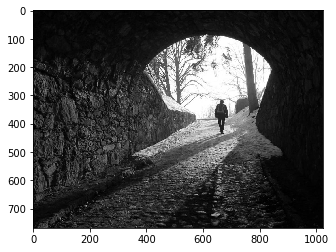

In [38]:
plt.imshow(np.abs(fft.ifft(fft.fft(img))), cmap='gray')
# cv2.imshow('Image with holomorphic filter', np.interp(abs_img_f, (abs_img_f.min(), abs_img_f.max()), (0, 255)))
# cv2.waitKey(0)
# cv2.destroyAllWindows()